<a href="https://colab.research.google.com/github/vimigueloli/ICPD/blob/main/Rede_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A seguir será desenvolvida a Logica por trás da IA de analise e em seguida essa logica sera convertida em uma classe para implementação do codigo em qualquer aplicação

lembrando que para o funcionamento dessa classe apresentada no final do notebook sempre será necessário ajustar a licença para download de arquivos do kaggle

In [1]:
 ##configurando o funcionamento do kaggle para a importação dos dados
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset ##vale a pena ressaltar que para o funcionamento desse bloco é necessário upar para a aba de arquivos uma licensa de download do site kaggle

##Extraindo os arquivos que vieram compactados do kaggle
import zipfile
with zipfile.ZipFile('/content/stroke-prediction-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 26.5MB/s]


In [49]:
##passando os dados que vão ser analizados para uma variavel
import pandas as pd
dados= pd.read_csv('healthcare-dataset-stroke-data.csv')
dados1= pd.read_csv('healthcare-dataset-stroke-data.csv')

In [51]:
##pre processamento dos dados transformando palavras em numeros e preenchendo valores vazios para indicar uma classificação pois IA não lida bem com strings
from sklearn.preprocessing import LabelEncoder

##preenchendo valores vazios
dados['smoking_status'] = dados['smoking_status'].replace(['Unknown'], 'never smoked')
dados[['bmi']]=dados[['bmi']].fillna(26)

rapidinho = dados['smoking_status'].unique()

##transformando strings em numeros
classificador = LabelEncoder() 
dados[['gender']] = classificador.fit_transform(dados[['gender']])
dados[['ever_married']] = classificador.fit_transform(dados[['ever_married']])
dados[['work_type']] = classificador.fit_transform(dados[['work_type']])
dados[['Residence_type']] = classificador.fit_transform(dados[['Residence_type']])
dados[['smoking_status']] = classificador.fit_transform(dados[['smoking_status']])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
##mesmo processo adaptado para o comitê
from sklearn.preprocessing import LabelEncoder

##preenchendo valores vazios
dados1['smoking_status'] = dados1['smoking_status'].replace(['Unknown'], 'never smoked')
dados1[['bmi']]=dados[['bmi']].fillna(26)

##transformando strings em numeros
classificador = LabelEncoder() 
dados1[['gender']] = classificador.fit_transform(dados1[['gender']])
dados1[['ever_married']] = classificador.fit_transform(dados1[['ever_married']])
dados1[['work_type']] = classificador.fit_transform(dados1[['work_type']])
dados1[['Residence_type']] = classificador.fit_transform(dados1[['Residence_type']])
dados1[['smoking_status']] = classificador.fit_transform(dados1[['smoking_status']])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
## gerando graficos de comparação de dados do banco
import seaborn as snb

snb.pairplot(dados,hue = 'stroke')

vale apena destacar que os proximos 3 blocos de código são escolhas diferentes de trabalhar com o banco de dado e foi decidido expor as 3 opções para mostrar o estudo feito na escolha da melhor forma de lidar com os dados

In [ ]:
##faz o undersampling
import numpy as np

## separa os pacientes que não tiveram derrame
saudaveis = dados[dados.stroke == 0].index

amostra_s = np.random.choice(saudaveis, 250, replace=False)
## separa os pacientes que tiveram derrame
doentes = dados[dados.stroke == 1].index

##junta os pacientes e sapara os dados a serem analizados das conclusões laboratoriais
amostra = dados.loc[amostra_s]
amostra = amostra.append(dados.loc[doentes])
dados = amostra
x= dados[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
y= dados[['stroke']]

In [ ]:
##faz o Oversampling para lidar com o banco de dados desbalanceado
from imblearn.over_sampling import SMOTENC

##separa os dados a serem analizados das conclusões laboratoriais
x= dados[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
y= dados[['stroke']]

##gera os dados de maneira estatistica
smt=SMOTENC(categorical_features=[0, 2], random_state=0)
x,y = smt.fit_resample(x,y)

## arredonda e reagrupa os dados em uma dataframe pandas 
x = pd.DataFrame(x,columns=['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status'])
x['work_type'] = x['work_type'].round(0)      
x['smoking_status'] = x['smoking_status'].round(0)  
x['Residence_type'] = x['Residence_type'].round(0)
x['heart_disease'] = x['heart_disease'].round(0)
x['ever_married'] = x['ever_married'].round(0)
x['age'] = x['age'].round(0)
y = pd.DataFrame(y,columns=['stroke'])

## reconstroi o dataframe original após o oversampling para analises
dados = x
dados.insert(10, 'stroke', 0, allow_duplicates=False)
dados[['stroke']] = y

## devido a um bug na reconstrução dos dados o x é novamente separado 
x = x[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
##uso dos dois casos para o comitê
from imblearn.over_sampling import SMOTENC
import pandas as pd
import numpy as np

##undersampling

## separa os pacientes que não tiveram derrame
saudaveis = dados1[dados1.stroke == 0].index

amostra_s = np.random.choice(saudaveis, 250, replace=False)
## separa os pacientes que tiveram derrame
doentes = dados1[dados1.stroke == 1].index

##junta os pacientes e sapara os dados a serem analizados das conclusões laboratoriais
amostra = dados1.loc[amostra_s]
amostra = amostra.append(dados1.loc[doentes])
dados1  = amostra
x1= dados1[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
y1= dados1[['stroke']]

##oversampling

##separa os dados a serem analizados das conclusões laboratoriais
x= dados[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
y= dados[['stroke']]

##gera os dados de maneira estatistica
smt=SMOTENC(categorical_features=[0, 2], random_state=0)
x,y = smt.fit_resample(x,y)

## arredonda e reagrupa os dados em uma dataframe pandas 
x = pd.DataFrame(x,columns=['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status'])
x['work_type'] = x['work_type'].round(0)      
x['smoking_status'] = x['smoking_status'].round(0)  
x['Residence_type'] = x['Residence_type'].round(0)
x['heart_disease'] = x['heart_disease'].round(0)
x['ever_married'] = x['ever_married'].round(0)
x['age'] = x['age'].round(0)
y = pd.DataFrame(y,columns=['stroke'])

## reconstroi o dataframe original após o oversampling para analises
dados = x
dados.insert(10, 'stroke', 0, allow_duplicates=False)
dados[['stroke']] = y

## devido a um bug na reconstrução dos dados o x é novamente separado 
x = x[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

In [ ]:
##mostra os dados após o oversampling  ou under sampling
import seaborn as snb

snb.pairplot(dados,hue = 'stroke')

Os blocos seguintes são diferentes tipos de modelo de Inteligência Artificial com diferentes configurações para a analize das melhores

In [ ]:
## rede neural para classificação com porcentagem SVM
from sklearn.svm import SVC

modelo = SVC(probability = True, kernel= 'rbf')


In [ ]:
## rede neural para classificação com porcentagem SVM
from sklearn.svm import SVC

modelo = SVC(probability = True, kernel= 'linear')


In [ ]:
## rede neural para classificação com porcentagem SVM
from sklearn.svm import SVC

modelo = SVC(probability = True, kernel= 'sigmoid')


In [ ]:
## rede neural para classificação com porcentagem SVM
from sklearn.svm import SVC

modelo = SVC(probability = True, kernel= 'poly',degree=2)


In [ ]:
## rede neural para classificação com porcentagem KNN
from sklearn.neighbors import KNeighborsClassifier

modelo = KNeighborsClassifier(weights='distance', n_neighbors= 10)


In [ ]:
## rede neural para classificação com porcentagem MLP
from sklearn.neural_network import MLPClassifier

modelo = MLPClassifier(random_state=2, hidden_layer_sizes = (200,2),learning_rate= 'adaptive')

In [ ]:
## rede neural para classificação por porcentagem com comitê
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

modelo = MLPClassifier(random_state=2, hidden_layer_sizes = (200,2),learning_rate= 'adaptive')
modelo1 = KNeighborsClassifier(weights='distance', n_neighbors= 10)
modelo2  = SVC(probability = True, kernel= 'poly',degree=2)



treino e teste da rede neural

In [ ]:
## testa e treina a rede gerando dados para analise (casos unitarios)
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

## separa a amostra de teste e de treino e logo em seguida treina a rede neural
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y)
modelo.fit(treino_x,treino_y)

## apos o treino testa a rede e gera alguns dados para a analise de seu desempenho e para geração de graficos
respostas_proba = (modelo.predict_proba(teste_x))*100
respostas = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y,respostas)
acuracia = acuracia*100
respostas_proba =pd.DataFrame(respostas_proba,columns=['falha','sucesso']) 
respostas_proba = respostas_proba[['sucesso']]
respostas_certas = teste_y*100
print(classification_report(teste_y,respostas))
print(acuracia)

In [ ]:
## testa e treina a rede gerando dados para analise (caso de comitê)
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

## separa a amostra de teste e de treino e logo em seguida treina a rede neural
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y)
treino_x1, teste_x1, treino_y1, teste_y1 = train_test_split(x1,y1)
modelo.fit(treino_x,treino_y)
modelo1.fit(treino_x,treino_y)
modelo2.fit(treino_x1,treino_y1)

## apos o treino testa a rede e gera alguns dados para a analise de seu desempenho e para geração de graficos
respostas_proba0  = (modelo.predict_proba(teste_x))*100
respostas_proba1 = (modelo1.predict_proba(teste_x))*100
respostas_proba2 = (modelo2.predict_proba(teste_x))*100
respostas0  = modelo.predict(teste_x)
respostas1 = modelo1.predict(teste_x)
respostas2 = modelo2.predict(teste_x)
acuracia = accuracy_score(teste_y,respostas0)*100
acuracia1 = accuracy_score(teste_y,respostas1)*100
acuracia2 = accuracy_score(teste_y,respostas2)*100

respostas_proba0 =pd.DataFrame(respostas_proba0, columns=['falha','sucesso']) 
respostas_proba0 = respostas_proba0[['sucesso']]

respostas_proba1 =pd.DataFrame(respostas_proba1,columns=['falha','sucesso']) 
respostas_proba1 = respostas_proba1[['sucesso']]

respostas_proba2 =pd.DataFrame(respostas_proba2,columns=['falha','sucesso']) 
respostas_proba2 = respostas_proba2[['sucesso']]


lista  = list(respostas_proba0['sucesso'])
lista1 = list(respostas_proba1['sucesso'])
lista2 = list(respostas_proba2['sucesso'])

listas = (lista,lista1,lista2)
listas = np.array(listas).T
probabilidade =pd.DataFrame(listas,columns=['sucesso0','sucesso1','sucesso2']) 
probabilidade['sucesso'] = probabilidade.sum(axis=1)
probabilidade['sucesso'] = probabilidade['sucesso']/3
respostas_proba = np.array(probabilidade['sucesso'])
respostas_proba =pd.DataFrame(respostas_proba,columns=['sucesso'])

respostas = (respostas0,respostas1,respostas2)

respostas = np.array(respostas).T
comite =pd.DataFrame(respostas,columns=['chute','chute1','chute2']) 
comite['soma'] = comite.sum(axis=1)
respostas = comite['soma']/3
respostas = respostas.round()




respostas_certas = teste_y*100


print(classification_report(teste_y,respostas))
print(acuracia)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1219
           1       0.80      0.91      0.85      1212

    accuracy                           0.84      2431
   macro avg       0.85      0.84      0.84      2431
weighted avg       0.85      0.84      0.84      2431

83.79267791032497


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


após a analise da IA basta gerar um grafico de seu desempenho e posibilitar a analise de um diagnóstico

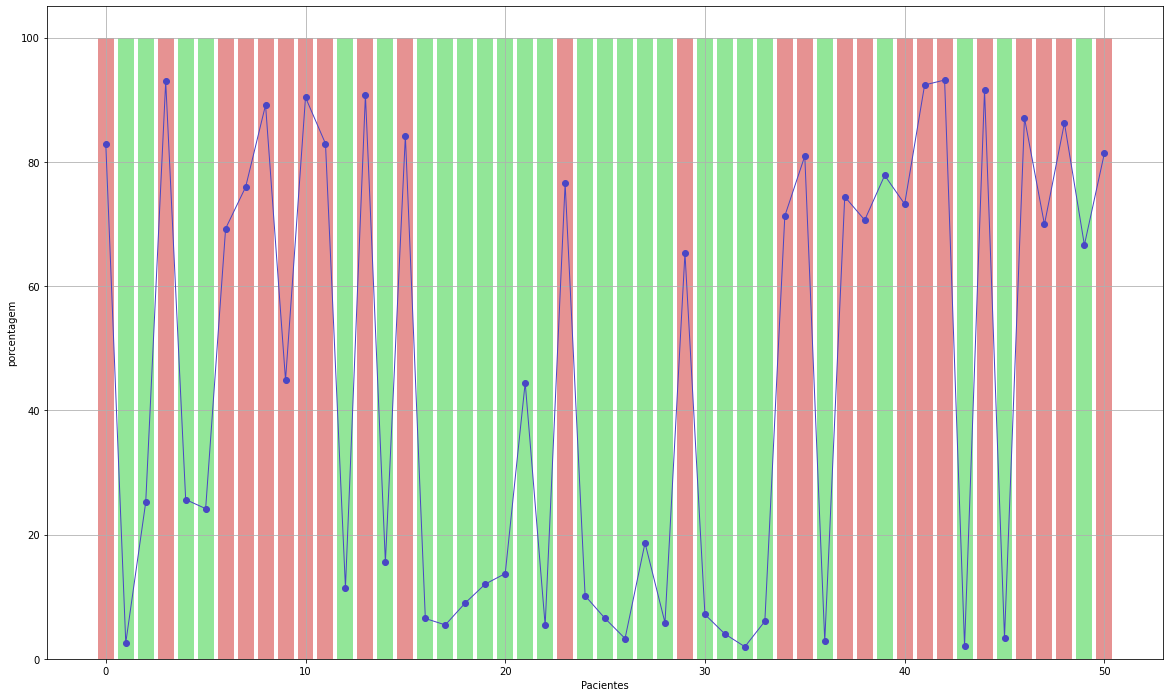

In [ ]:
## gerando um grafico para vizualização do desempenho da rede neural
import matplotlib.pyplot as mp
import numpy as np

## define o tamanho da amostra que vai para o grafico
respostas_certas = respostas_certas.head(51) 
respostas_proba = respostas_proba.head(51)

## define os dados do grafico e transforma em numpy arrays para que possam ser plotados
altura1 = []
altura2 = []
altura3 = []
for eixo in respostas_certas['stroke']:
  altura1.append(eixo)
for eixo in respostas_proba['sucesso']:
  altura2.append(eixo)
for altura in altura1:
  altura3.append((altura-100)*-1)
tamanho = np.arange(51)

##plota os dados no grafico
fig,ax = mp.subplots(figsize=(20,12))
mp.bar(tamanho,altura3,color = '#92e698')
mp.bar(tamanho,altura1,color = '#e69292')
mp.plot(tamanho,respostas_proba[['sucesso']],lw=1,marker='o',ms=6,c='#4946c5')
mp.xlabel('Pacientes')
mp.ylabel('porcentagem')
mp.grid()
mp.show()

In [ ]:
##testa o paciente com a rede gerada

##recebe os dados do paciente
paciente = [[1,21,0,0,0,1,1,80,26.7,2]]
paciente = pd.DataFrame(paciente,columns=['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status'])

##analiza os dados com a rede neural e mostra o resultado
chute = modelo.predict_proba(paciente) * 100
chute = pd.DataFrame(chute,columns=['falha','sucesso']) 
chute[['sucesso']]

,sucesso
0,0.009352


In [ ]:
##testa o paciente com o comitê da rede gerada

paciente = [[1,21,0,0,0,1,1,80,26.7,2]]
paciente = pd.DataFrame(paciente,columns=['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status'])


respostas_proba0  = (modelo.predict_proba(paciente))*100
respostas_proba1 = (modelo1.predict_proba(paciente))*100
respostas_proba2 = (modelo2.predict_proba(paciente))*100


respostas_proba0 =pd.DataFrame(respostas_proba0, columns=['falha','sucesso']) 
respostas_proba0 = respostas_proba0[['sucesso']]

respostas_proba1 =pd.DataFrame(respostas_proba1,columns=['falha','sucesso']) 
respostas_proba1 = respostas_proba1[['sucesso']]

respostas_proba2 =pd.DataFrame(respostas_proba2,columns=['falha','sucesso']) 
respostas_proba2 = respostas_proba2[['sucesso']]


lista  = list(respostas_proba0['sucesso'])
lista1 = list(respostas_proba1['sucesso'])
lista2 = list(respostas_proba2['sucesso'])

listas = (lista,lista1,lista2)
listas = np.array(listas).T
probabilidade =pd.DataFrame(listas,columns=['sucesso0','sucesso1','sucesso2']) 
probabilidade['sucesso'] = probabilidade.sum(axis=1)
respostas_proba['sucesso'] = probabilidade['sucesso']/3
respostas_proba = np.array(respostas_proba)
respostas_proba =pd.DataFrame(respostas_proba,columns=['sucesso'])

resultado = respostas_proba['sucesso'].head(1)

resultado = np.array(resultado)
resultado = resultado[0]
print("você tem %.2f"% resultado,'% de chance de ter um derrame')

você tem 3.78 % de chance de ter um derrame


Transformando esse cogigo em uma classe para que possa ser implementado em uma aplicação

In [ ]:
## classe de IA unica
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC

class ICPD:

  ##declaração da classe
  def __init__(self,amostra=True,tipo=1):
    self.amostra = amostra
    self.tipo = tipo
    self.banco = []
    self.X = []
    self.Y = []
    if tipo==1:
      self.modelo = SVC(probability = True, kernel= 'rbf')
    elif tipo==2:
      self.modelo = SVC(probability = True, kernel= 'linear')
    elif tipo==3:
      self.modelo = SVC(probability = True, kernel= 'sigmoid')
    elif tipo==4:
      self.modelo = SVC(probability = True, kernel= 'poly',degree=2) 
    elif tipo==5:
      self.modelo = KNeighborsClassifier(weights='distance', n_neighbors= 7)
    elif tipo==6:
      self.modelo = MLPClassifier(random_state=2, hidden_layer_sizes = (200,2),learning_rate= 'adaptive')  
    self.certas = []     
    self.proba  = []

  ##metodo que passa o banco de dados para uma variavel pandas e pre processa eles
  def iniciar(self):
    os.environ['KAGGLE_CONFIG_DIR']='/content'
    !kaggle datasets download -d fedesoriano/stroke-prediction-dataset
    with zipfile.ZipFile('/content/stroke-prediction-dataset.zip', 'r') as zip_ref:
      zip_ref.extractall('/content')
    dados= pd.read_csv('healthcare-dataset-stroke-data.csv')
    dados['smoking_status'] = dados['smoking_status'].replace(['Unknown'], 'never smoked')
    dados[['bmi']]=dados[['bmi']].fillna(26)
    classificador = LabelEncoder() 
    dados[['gender']] = classificador.fit_transform(dados[['gender']])
    dados[['ever_married']] = classificador.fit_transform(dados[['ever_married']])
    dados[['work_type']] = classificador.fit_transform(dados[['work_type']])
    dados[['Residence_type']] = classificador.fit_transform(dados[['Residence_type']])
    dados[['smoking_status']] = classificador.fit_transform(dados[['smoking_status']])
    self.banco = dados

  ##metodo que faz o ajuste da amostra via overampling caso 'amostra' == FALSE ou undersampling caso 'amostra' == TRUE  
  def ajuste(self):
    dados = self.banco
    if self.amostra == True:
      saudaveis = dados[dados.stroke == 0].index
      amostra_s = np.random.choice(saudaveis, 250, replace=False)
      doentes = dados[dados.stroke == 1].index
      amostra = dados.loc[amostra_s]
      amostra = amostra.append(dados.loc[doentes])
      dados = amostra
      x= dados[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
      y= dados[['stroke']]
    else:
      x= dados[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
      y= dados[['stroke']]
      smt=SMOTENC(categorical_features=[0, 2], random_state=0)
      x,y = smt.fit_resample(x,y)
      x = pd.DataFrame(x,columns=['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status'])
      x['work_type'] = x['work_type'].round(0)      
      x['smoking_status'] = x['smoking_status'].round(0)  
      x['Residence_type'] = x['Residence_type'].round(0)
      x['heart_disease'] = x['heart_disease'].round(0)
      x['ever_married'] = x['ever_married'].round(0)
      x['age'] = x['age'].round(0)
      y = pd.DataFrame(y,columns=['stroke'])
      dados = x
      dados.insert(10, 'stroke', 0, allow_duplicates=False)
      dados[['stroke']] = y
      x = x[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
    self.banco= dados
    self.X= x
    self.Y= y 

  ##metodo que treina a IA e armazena dados para a geração do grafico
  def treino(self):
    x= self.X
    y= self.Y 
    treino_x, teste_x, treino_y, teste_y = train_test_split(x,y)
    self.modelo.fit(treino_x,treino_y)
    respostas_proba = (self.modelo.predict_proba(teste_x))*100
    respostas = self.modelo.predict(teste_x)
    respostas_proba =pd.DataFrame(respostas_proba,columns=['falha','sucesso']) 
    respostas_proba = respostas_proba[['sucesso']]
    respostas_certas = teste_y*100
    self.certas= respostas_certas
    self.proba = respostas_proba

  ##metodo que gera um grafico para exibição
  def grafico(self):
    respostas_certas = self.certas.head(51)
    respostas_proba = self.proba.head(51)
    altura1 = []
    altura2 = []
    altura3 = []
    for eixo in respostas_certas['stroke']:
      altura1.append(eixo)
    for eixo in respostas_proba['sucesso']:
      altura2.append(eixo)
    for altura in altura1:
      altura3.append((altura-100)*-1)
    tamanho = np.arange(51)
    fig,ax = mp.subplots(figsize=(20,12))
    mp.bar(tamanho,altura3,color = '#92e698')
    mp.bar(tamanho,altura1,color = '#e69292')
    mp.plot(tamanho,respostas_proba[['sucesso']],lw=1,marker='o',ms=6,c='#4946c5')
    mp.xlabel('Pacientes')
    mp.ylabel('porcentagem')
    mp.grid()
    mp.show()
    ##mp.savefig("desempenho.png",dpi=300)
  
  ##metodo que recebe os dados do paciente e da um valor em porcentagem da chance dessa pessoa ter derrame de acordo com o banco de dados analizados
  def diagnostico(self,paciente):
    ficha = paciente.get_data()
    chute = self.modelo.predict_proba(ficha) * 100
    chute = pd.DataFrame(chute,columns=['falha','sucesso'])
    chute = chute['sucesso']
    chute = np.array(chute)
    chute = chute[0]
    return chute

In [ ]:
## classe de comitê
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC

class CCPD:

  ##declaração da classe
  def __init__(self):
    os.environ['KAGGLE_CONFIG_DIR']='/content'
    !kaggle datasets download -d fedesoriano/stroke-prediction-dataset
    with zipfile.ZipFile('/content/stroke-prediction-dataset.zip', 'r') as zip_ref:
      zip_ref.extractall('/content')
    dados = pd.read_csv('healthcare-dataset-stroke-data.csv')
    dados1= pd.read_csv('healthcare-dataset-stroke-data.csv')
    dados['smoking_status'] = dados['smoking_status'].replace(['Unknown'], 'never smoked')
    dados[['bmi']]=dados[['bmi']].fillna(26)
    classificador = LabelEncoder() 
    dados[['gender']] = classificador.fit_transform(dados[['gender']])
    dados[['ever_married']] = classificador.fit_transform(dados[['ever_married']])
    dados[['work_type']] = classificador.fit_transform(dados[['work_type']])
    dados[['Residence_type']] = classificador.fit_transform(dados[['Residence_type']])
    dados[['smoking_status']] = classificador.fit_transform(dados[['smoking_status']])
    dados1['smoking_status'] = dados1['smoking_status'].replace(['Unknown'], 'never smoked')
    dados1[['bmi']]=dados[['bmi']].fillna(26)
    classificador = LabelEncoder() 
    dados1[['gender']] = classificador.fit_transform(dados1[['gender']])
    dados1[['ever_married']] = classificador.fit_transform(dados1[['ever_married']])
    dados1[['work_type']] = classificador.fit_transform(dados1[['work_type']])
    dados1[['Residence_type']] = classificador.fit_transform(dados1[['Residence_type']])
    dados1[['smoking_status']] = classificador.fit_transform(dados1[['smoking_status']])
    saudaveis = dados1[dados1.stroke == 0].index
    amostra_s = np.random.choice(saudaveis, 250, replace=False)
    doentes = dados1[dados1.stroke == 1].index
    amostra = dados1.loc[amostra_s]
    amostra = amostra.append(dados1.loc[doentes])
    dados1  = amostra
    x1= dados1[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
    y1= dados1[['stroke']]
    x= dados[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
    y= dados[['stroke']]
    smt=SMOTENC(categorical_features=[0, 2], random_state=0)
    x,y = smt.fit_resample(x,y)
    x = pd.DataFrame(x,columns=['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status'])
    x['work_type'] = x['work_type'].round(0)      
    x['smoking_status'] = x['smoking_status'].round(0)  
    x['Residence_type'] = x['Residence_type'].round(0)
    x['heart_disease'] = x['heart_disease'].round(0)
    x['ever_married'] = x['ever_married'].round(0)
    x['age'] = x['age'].round(0)
    y = pd.DataFrame(y,columns=['stroke'])
    dados = x
    dados.insert(10, 'stroke', 0, allow_duplicates=False)
    dados[['stroke']] = y
    x = x[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
    self.modelo   = MLPClassifier(random_state=2, hidden_layer_sizes = (200,2),learning_rate= 'adaptive')
    self.modelo1  = KNeighborsClassifier(weights='distance', n_neighbors= 10)
    self.modelo2  = SVC(probability = True, kernel= 'poly',degree=2)
    treino_x, teste_x, treino_y, teste_y = train_test_split(x,y)
    treino_x1, teste_x1, treino_y1, teste_y1 = train_test_split(x1,y1)
    self.modelo.fit(treino_x,treino_y)
    self.modelo1.fit(treino_x,treino_y)
    self.modelo2.fit(treino_x1,treino_y1)
    respostas_proba0 = (self.modelo.predict_proba(teste_x))*100
    respostas_proba1 = (self.modelo1.predict_proba(teste_x))*100
    respostas_proba2 = (self.modelo2.predict_proba(teste_x))*100
    respostas0 = self.modelo.predict(teste_x)
    respostas1 = self.modelo1.predict(teste_x)
    respostas2 = self.modelo2.predict(teste_x)
    acuracia  = accuracy_score(teste_y,respostas0)*100
    acuracia1 = accuracy_score(teste_y,respostas1)*100
    acuracia2 = accuracy_score(teste_y,respostas2)*100
    respostas_proba0 =pd.DataFrame(respostas_proba0, columns=['falha','sucesso']) 
    respostas_proba0 = respostas_proba0[['sucesso']]
    respostas_proba1 =pd.DataFrame(respostas_proba1,columns=['falha','sucesso']) 
    respostas_proba1 = respostas_proba1[['sucesso']]
    respostas_proba2 =pd.DataFrame(respostas_proba2,columns=['falha','sucesso']) 
    respostas_proba2 = respostas_proba2[['sucesso']]
    lista  = list(respostas_proba0['sucesso'])
    lista1 = list(respostas_proba1['sucesso'])
    lista2 = list(respostas_proba2['sucesso'])
    listas = (lista,lista1,lista2)
    listas = np.array(listas).T
    probabilidade =pd.DataFrame(listas,columns=['sucesso0','sucesso1','sucesso2']) 
    probabilidade['sucesso'] = probabilidade.sum(axis=1)
    probabilidade['sucesso'] = probabilidade['sucesso']/3
    respostas_proba = np.array(probabilidade['sucesso'])
    self.respostas_proba =pd.DataFrame(respostas_proba,columns=['sucesso'])
    respostas = (respostas0,respostas1,respostas2)
    respostas = np.array(respostas).T
    comite =pd.DataFrame(respostas,columns=['chute','chute1','chute2']) 
    comite['soma'] = comite.sum(axis=1)
    respostas = comite['soma']/3
    respostas = respostas.round()
    self.respostas_certas = teste_y*100

  ##metodo que gera um grafico para exibição
  def grafico(self):
    respostas_certas = self.respostas_certas.head(51)
    respostas_proba = self.respostas_proba.head(51)
    altura1 = []
    altura2 = []
    altura3 = []
    for eixo in respostas_certas['stroke']:
      altura1.append(eixo)
    for eixo in respostas_proba['sucesso']:
      altura2.append(eixo)
    for altura in altura1:
      altura3.append((altura-100)*-1)
    tamanho = np.arange(51)
    fig,ax = mp.subplots(figsize=(20,12))
    mp.bar(tamanho,altura3,color = '#92e698')
    mp.bar(tamanho,altura1,color = '#e69292')
    mp.plot(tamanho,respostas_proba[['sucesso']],lw=1,marker='o',ms=6,c='#4946c5')
    mp.xlabel('Pacientes')
    mp.ylabel('porcentagem')
    mp.grid()
    mp.show()
    ##mp.savefig("desempenho.png",dpi=300)
  
  ##metodo que recebe os dados do paciente e da um valor em porcentagem da chance dessa pessoa ter derrame de acordo com o banco de dados analizados
  def diagnostico(self,paciente):
    ficha = paciente.get_data()
    respostas_proba0 = (self.modelo.predict_proba(ficha))*100
    respostas_proba1 = (self.modelo1.predict_proba(ficha))*100
    respostas_proba2 = (self.modelo2.predict_proba(ficha))*100
    respostas_proba0 = pd.DataFrame(respostas_proba0, columns=['falha','sucesso']) 
    respostas_proba0 = respostas_proba0[['sucesso']]
    respostas_proba1 = pd.DataFrame(respostas_proba1,columns=['falha','sucesso']) 
    respostas_proba1 = respostas_proba1[['sucesso']]
    respostas_proba2 = pd.DataFrame(respostas_proba2,columns=['falha','sucesso']) 
    respostas_proba2 = respostas_proba2[['sucesso']]
    lista  = list(respostas_proba0['sucesso'])
    lista1 = list(respostas_proba1['sucesso'])
    lista2 = list(respostas_proba2['sucesso'])
    listas = (lista,lista1,lista2)
    listas = np.array(listas).T
    probabilidade =pd.DataFrame(listas,columns=['sucesso0','sucesso1','sucesso2']) 
    probabilidade['sucesso'] = probabilidade.sum(axis=1)
    probabilidade['sucesso'] = probabilidade['sucesso']/3
    respostas_proba = np.array(probabilidade['sucesso'])
    respostas_proba =pd.DataFrame(respostas_proba,columns=['sucesso'])
    resultado = respostas_proba['sucesso'].head(1)
    resultado = np.array(resultado)
    resultado = resultado[0]
    return resultado